# LOAN SIZE PREDICTION

#### A machine learning project done as part of the Data Science Program at Explore AI Academy.

### Preparation and Understanding


We will be using the `personal_loans` dataset which contains data of **bank customers**. The data includes basic information of each customer as well as whether the customer took out a loan and the size of that loan.

The basic information consists of:
   * **Age** - Customer's age in years 
   * **Experience** - working experience in years
   * **Income** - annual income expressed in multiples of 1000
   * **Family** - members in family including the customer self
   * **CCAvg** - average monthly spend on credit card
   * **Education** - Undergrad/Postgrad/Professional
   * **Mortgage** - amount expressed in multiples of 1000'
   * **Securities Account** - whether the customer has a securities account
   * **CD Account** - whether the customer has a cash deposit account
   * **Online** - whether the customer is using online banking
   * **Gender** - Male/Female
   * **Area** - Geographic area where the customer lives 
   * **Personal Loan** - whether the person took out a personal loan
   * **Loan Size** - amount expressed in multiples of  1000

We will **load our data** as a Pandas DataFrame:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/bootcamps/Personal_Loans.csv')
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,Professional,0,1,0,0,Male,Santa Clara,0,0
4842,67,43,79,4,1.7,Postgrad,215,0,1,1,Male,Yolo,0,0
4843,67,43,105,4,1.7,Postgrad,0,0,0,1,Female,Fresno,0,0
4844,67,41,112,1,2.0,Undergrad,0,1,0,0,Female,Los Angeles,0,0


As we can see, our dataset contains 13 columns as predictor variables in both types (numerical and categorical). Moreover, the `Personal Loan` feature indicates the presence of individuals who either have or haven't taken a loan before. As a result, we have to filter our data based on the condition `Personal Loan` = 1 as our goal is to predict a loan size based on a data of clients who have already taken one.

### Filtering, Dummy encoding & Variables Separation

In [3]:
df = df[df['Personal Loan'] == 1]
df = df.drop(['Personal Loan'],axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,65,39,170,3,7.9,Professional,99,0,1,1,Female,Los Angeles,48
467,65,41,170,4,6.1,Postgrad,0,0,1,1,Male,San Francisco,42
468,65,39,184,1,5.4,Professional,176,0,1,1,Male,Los Angeles,29
469,65,41,185,3,2.0,Postgrad,0,0,0,0,Male,Kern,46


The number of entries is decreased as we filtered the dataset. Also, the column `Personal Loan` is dropped as we don't need it anymore.

Now, let's apply the dummy variable encoding in order to transform the categorical features (`Education` , `Gender` , `Area`) into numerical format. We should set the condition `drop_first=True` to ensure that, for each feature with n categories, we will have just n-1 columns of 0's and 1's.

In [4]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,Loan Size,...,Area_San Mateo,Area_Santa Barbara,Area_Santa Clara,Area_Santa Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,65,39,170,3,7.9,99,0,1,1,48,...,False,False,False,False,False,False,False,False,False,False
467,65,41,170,4,6.1,0,0,1,1,42,...,False,False,False,False,False,False,False,False,False,False
468,65,39,184,1,5.4,176,0,1,1,29,...,False,False,False,False,False,False,False,False,False,False
469,65,41,185,3,2.0,0,0,0,0,46,...,False,False,False,False,False,False,False,False,False,False


The number of features increased from 12 to 40 predictor variables. This large number inspires us to several concepts such as variable selection (correlation and significance // variance thresholds) and regularisation (Ridge/Lasso)...

We will keep that in mind and go forward to continue our preprocessing and analysis.

In [5]:
# Making sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]

# Reordering columns with the dependent variable (Loan_Size) the last column
column_titles = [col for col in df_dummies.columns if col != 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)
df_dummies

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,False,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,65,39,170,3,7.9,99,0,1,1,True,...,False,False,False,False,False,False,False,False,False,48
467,65,41,170,4,6.1,0,0,1,1,False,...,False,False,False,False,False,False,False,False,False,42
468,65,39,184,1,5.4,176,0,1,1,True,...,False,False,False,False,False,False,False,False,False,29
469,65,41,185,3,2.0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,46


In [6]:
# Separating the predictor variables from the target variable
X = df_dummies.drop('Loan_Size', axis=1)
Y = df_dummies['Loan_Size']

### EDA : Description & Info, Linearity and Multicollinearity

Let's explore the statistics summary of our data

In [7]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     471 non-null    int64  
 1   Experience              471 non-null    int64  
 2   Income                  471 non-null    int64  
 3   Family                  471 non-null    int64  
 4   CCAvg                   471 non-null    float64
 5   Mortgage                471 non-null    int64  
 6   Securities_Account      471 non-null    int64  
 7   CD_Account              471 non-null    int64  
 8   Online                  471 non-null    int64  
 9   Education_Professional  471 non-null    bool   
 10  Education_Undergrad     471 non-null    bool   
 11  Gender_Male             471 non-null    bool   
 12  Area_Butte              471 non-null    bool   
 13  Area_Contra_Costa       471 non-null    bool   
 14  Area_Fresno             471 non-null    bool   

In [8]:
df_dummies.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,45.205945,19.991507,144.811040,2.609342,3.901274,101.598726,0.125265,0.286624,0.607219,33.231423
std,11.626366,11.589427,31.761417,1.112902,2.098956,161.389361,0.331372,0.452665,0.488888,9.759205
min,26.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,45.000000,20.000000,143.000000,3.000000,3.800000,0.000000,0.000000,0.000000,1.000000,32.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,193.000000,0.000000,1.000000,1.000000,41.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,50.000000


There is no feature which has a Null value in any entry. In addition, we can observe the columns created by dummy variable encoding as their type is bollean, so no predictor variable is now categorical.

Now, let's explore two of the most important concepts regarding the analysis of features and target variable : we are talking about **Checking for Linearity ( predictors vs response variable )** and **Checking for multicollinearity ( predictor vs predictor )** .

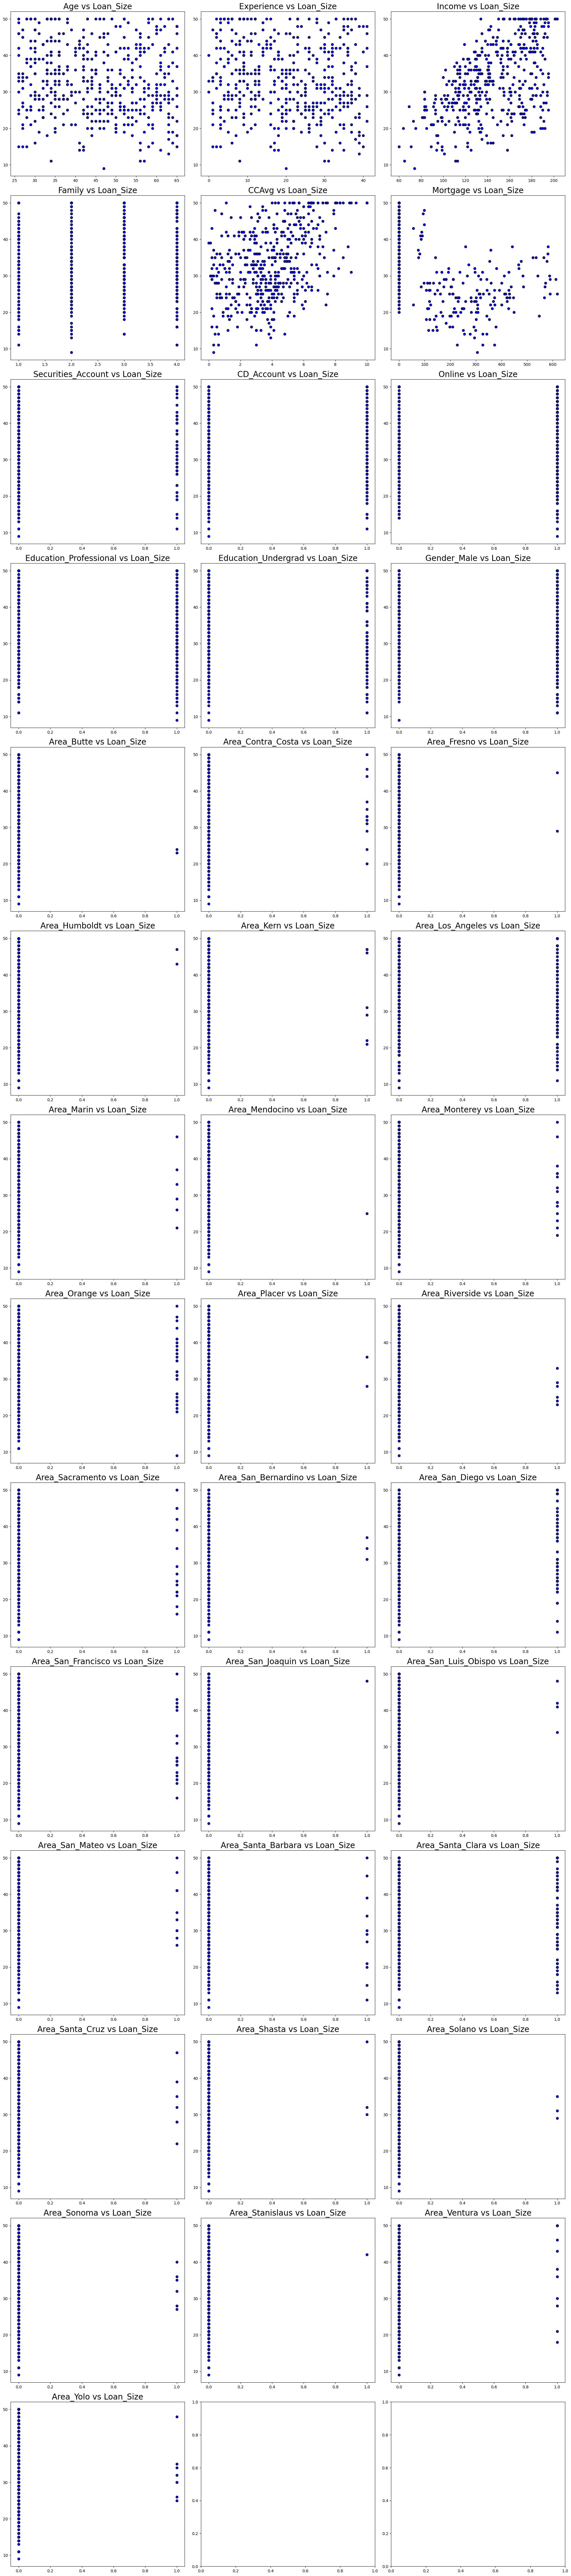

In [11]:
fig, axs = plt.subplots(14,3, figsize=(20,90),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(X.columns):
    axs[index].set_title("{} vs Loan_Size".format(column), fontsize=20)
    axs[index].scatter(x=X[column], y=Y, color='blue', edgecolor='k')
    
fig.tight_layout(pad=1)

In [12]:
# We check for correlation
df_dummies.corr(numeric_only=True)['Loan_Size'].abs().sort_values()

Area_Sonoma               0.002697
Area_Santa_Cruz           0.002916
Area_San_Bernardino       0.006312
Area_Placer               0.008249
Education_Professional    0.008472
Area_Yolo                 0.009862
CD_Account                0.011676
Area_Solano               0.012851
Area_Marin                0.014348
Area_Kern                 0.018683
Online                    0.019705
Area_Contra_Costa         0.021040
Securities_Account        0.022597
Area_Orange               0.024388
Area_Fresno               0.025244
Area_Santa_Clara          0.027144
Area_Monterey             0.029111
Area_Shasta               0.033688
Area_Mendocino            0.038947
Area_Stanislaus           0.041488
Area_San_Mateo            0.041827
Area_Sacramento           0.048955
Area_San_Diego            0.054835
Area_San_Francisco        0.057997
Area_Ventura              0.064104
Area_Santa_Barbara        0.064236
Area_Butte                0.065186
Gender_Male               0.068962
Area_San_Joaquin    

From the scatter plots of each predictor against the response variable, and the results of the correlation coefficients between them, it seems that `Income` and `Mortgage` features tend to have a linear relation shape with `Loan_Size`, but the points are too far from the imaginary line of best fit, and this is explained by the decreased correlation coefficients (0.523 and 0.496).

Now, let's check the multicollinearity issue between variables :

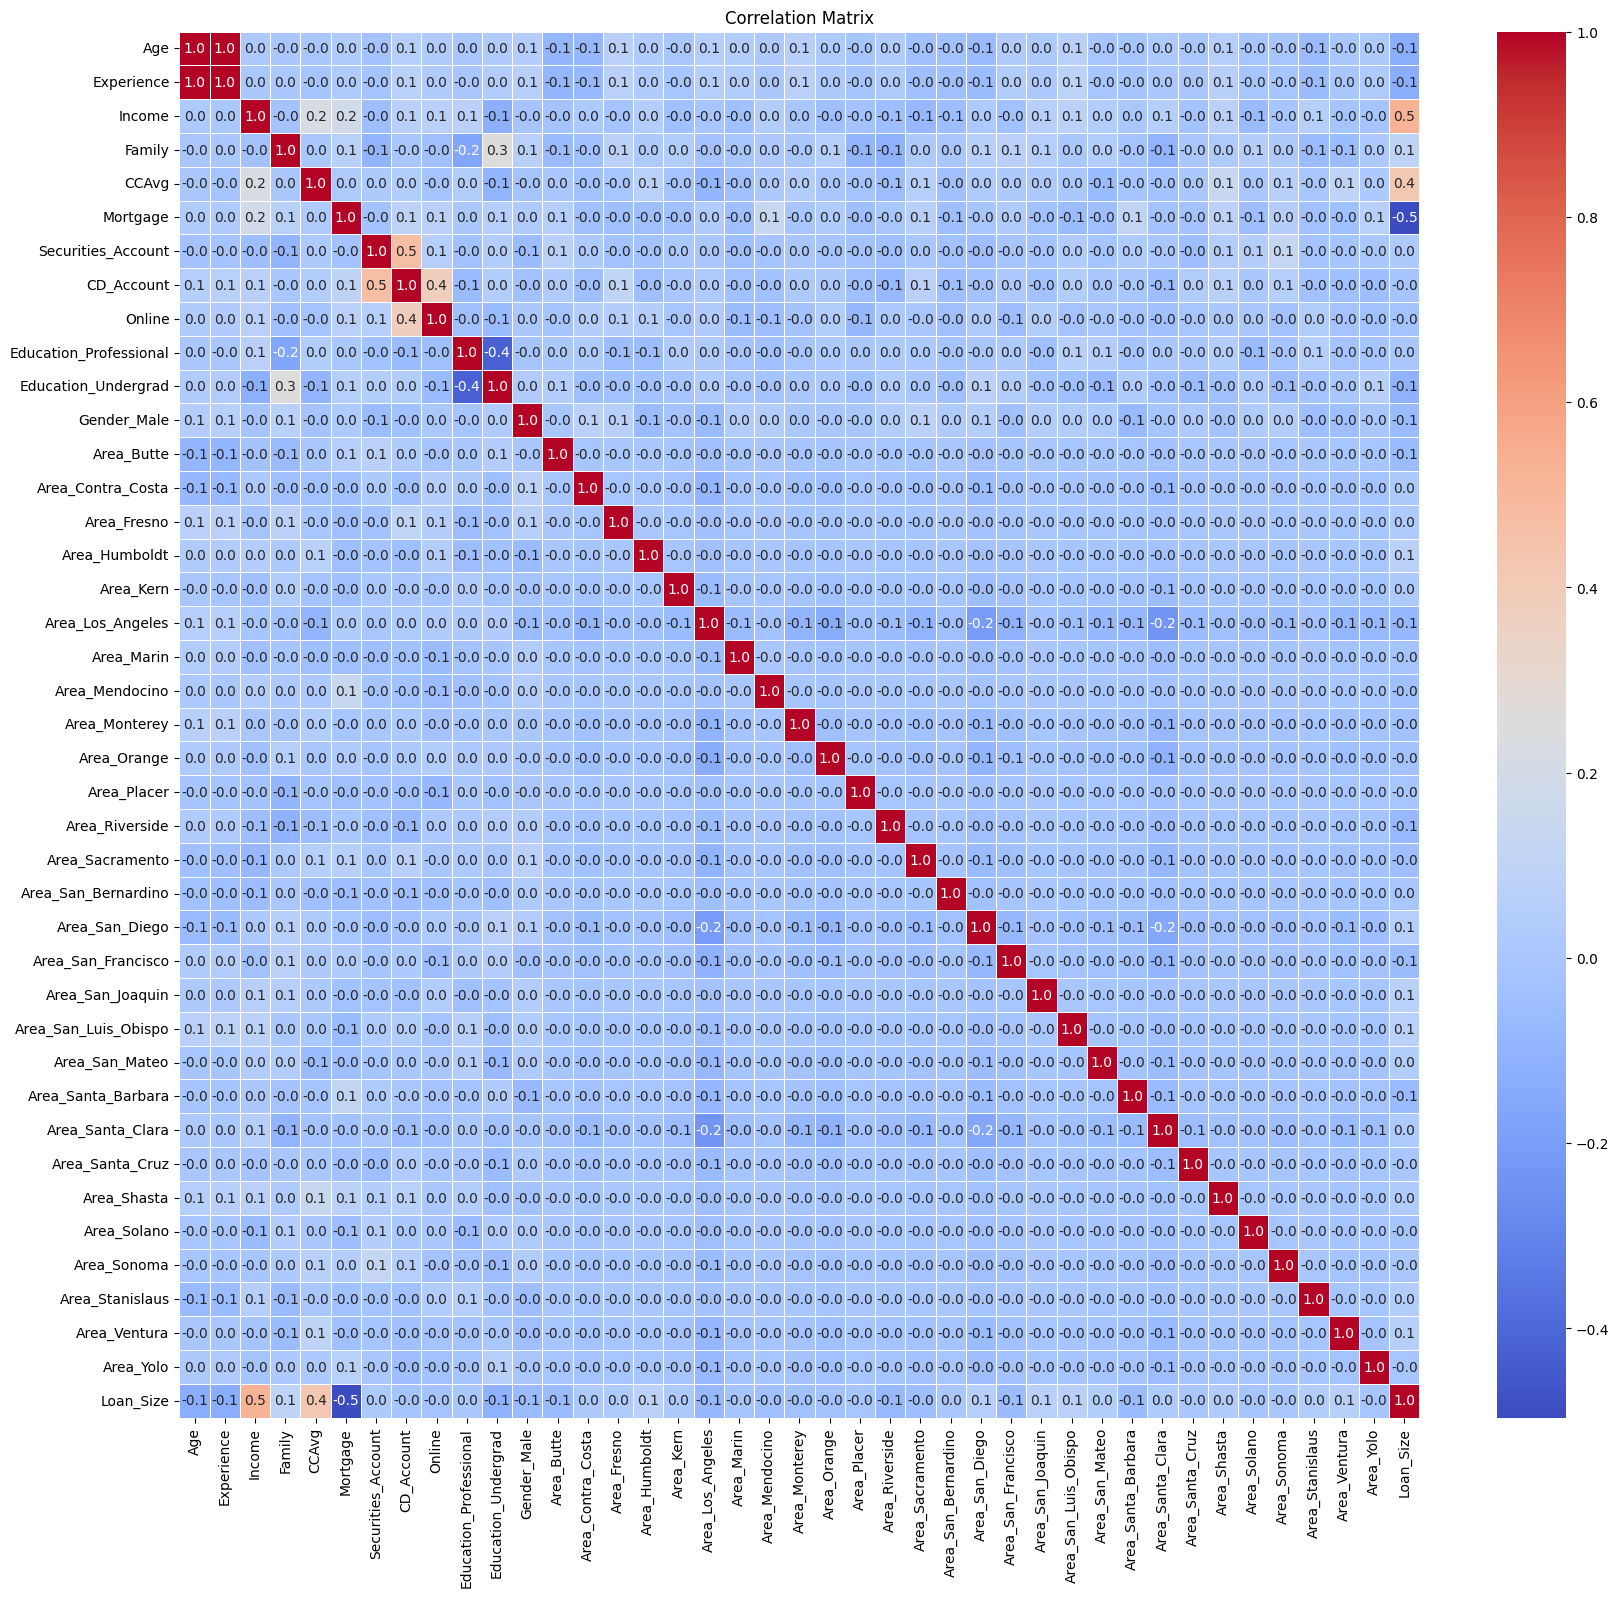

In [15]:
correlation_matrix = df_dummies.corr(numeric_only=True)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can easily observe from the top left corner of the correlation matrix that `Experience` and `Age` are highly correlated (perhaps unsurprising if we take a moment to think about it), and there is a moderate collinearity between some variables like: `CD_Account` and `Securities_Account`, `Online` and `CD_Account`, `Education_Undergrad` and `Educatino_Professional` ...

Consequently, we have to pay attention when training models, because any multicollinearity problem can affect the model performance.

Finally, let's split our dataset into train data and test data :

In [16]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

### B. Multiple Linear Regression : 3 different models

As we saw earlier, our dataset contained a lot of features (40 columns) after applying dummy variable encoding, and certainly we won't have to use them all. However, it's better to test all possible scenarios, where we will be using a **MLR with all variables**, **MLR with variable selection by correlation and significance**, and a **MLR with variable selection by variance threshold**.

### B.1. MLR without Variable Selection

In [17]:
# create model object
lm = LinearRegression()

# train model
lm.fit(X_train, y_train)

# extract model intercept
beta_0 = float(lm.intercept_)

# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", beta_0)
print(beta_js)

Intercept: 13.96023673011802
                        Coefficient
Age                       -0.319080
Experience                 0.234697
Income                     0.171639
Family                     1.109522
CCAvg                      1.468632
Mortgage                  -0.036012
Securities_Account         1.190744
CD_Account                -0.220188
Online                    -0.117420
Education_Professional    -0.305730
Education_Undergrad        0.134148
Gender_Male               -0.975308
Area_Butte                -3.670442
Area_Contra_Costa          0.060451
Area_Fresno                1.867833
Area_Humboldt              0.192864
Area_Kern                  2.161962
Area_Los_Angeles          -0.789686
Area_Marin                 0.239330
Area_Mendocino             3.549440
Area_Monterey             -2.743769
Area_Orange                0.603621
Area_Placer               -0.693949
Area_Riverside            -1.361676
Area_Sacramento            1.823417
Area_San_Bernardino        2.269845

In [18]:
# Predict the values using the model
all_y_pred_train = lm.predict(X_train)
all_y_pred_test = lm.predict(X_test)

# Calculate the Mean Squared Error
all_train_mse = mean_squared_error( y_train , all_y_pred_train )
all_test_mse = mean_squared_error( y_test , all_y_pred_test )

# Calculate the R-squared metric
all_train_r2 = r2_score( y_train , all_y_pred_train )
all_test_r2 = r2_score( y_test , all_y_pred_test )

print('Train MSE :' , all_train_mse)
print('Test MSE  :' , all_test_mse)
print('Train r²  :' , all_train_r2)
print('Test r²   :' , all_test_r2)

Train MSE : 20.475769693946567
Test MSE  : 26.27890847036636
Train r²  : 0.7714576958305627
Test r²   : 0.7728009808223439


The fitting results show a good correlation, either for training or testing data, which proves that the model handles the unseen data as good as the training data, even if the test MSE increased a little.

We will keep those metrics for later.

### B.2. MLR with Variable Selection by correlation and significance

In this part, we will decide the chosen variables for training the MLR model. We must calculate the **p_value**(s) of the predictors, and then pick the features whith a p_value less then level of significance (5%). So let's dive into this process step by step.

We will start with calculating the correlation coefficients and p_value(s) of the features with the target variable.

In [19]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)

dict_cp = {}
column_titles = [col for col in corrs.index if col!= 'Loan_Size']

for col in column_titles:
    p_val = round( pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1] , 6)
    dict_cp[col] = { 'Correlation_Coefficient':corrs[col], 'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')

df_cp_sorted

,Correlation_Coefficient,P_Value
Income,0.522566,0.000000
Mortgage,-0.496354,0.000000
CCAvg,0.420913,0.000000
Experience,-0.131946,0.004124
Age,-0.130709,0.004492
Education_Undergrad,-0.107046,0.020143
Family,0.097280,0.034806
Area_Los_Angeles,-0.079507,0.084773
Area_Humboldt,0.078831,0.087459
Area_San_Luis_Obispo,0.076123,0.098929


As we can see, this dataframe contains the correlation coefficients and p_value(s) of the features against `Loan_Size`, ordered in an ascending order of p_value. From the table above, there is just a few predictors that have a p_value < 0.05 , this is a good news as, when we reduce the number of features, we avoid the risk of overfitting, but at the same time, we should revise the excluded predictors as we may drop an important one, so this step require domain knowledge for the data scientist.

After picking the right predictors, we have to check their multicollinearity so that we avoid the overfitting problem.

In [20]:
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]
cor = X_data.corr()
cor

,Income,CCAvg,Family,Education_Undergrad,Age,Experience,Mortgage
Income,1.000000,0.225125,-0.024424,-0.128103,0.015225,0.009290,0.185415
CCAvg,0.225125,1.000000,0.007318,-0.098527,-0.001101,-0.016679,0.026942
Family,-0.024424,0.007318,1.000000,0.254193,-0.000511,0.008815,0.065640
Education_Undergrad,-0.128103,-0.098527,0.254193,1.000000,0.031143,0.038913,0.058257
Age,0.015225,-0.001101,-0.000511,0.031143,1.000000,0.994515,0.032283
Experience,0.009290,-0.016679,0.008815,0.038913,0.994515,1.000000,0.027737
Mortgage,0.185415,0.026942,0.065640,0.058257,0.032283,0.027737,1.000000


As expected, the columns `Age` and `Experience` represent a strong collinearity, so we have to drop one of them.

We will choose `Age` to exclude as its p_value is greater than the `Experience`'s one. Finally we extract the remaining predictors names and fit the model.

In [21]:
# Lets take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Get training and testing data for correlation and significance model
CP_X_train = X_train[X_corr_names]
CP_X_test  = X_test[X_corr_names]

# Instantiate & Fit the model
lm_cp = LinearRegression()
lm_cp.fit(CP_X_train, y_train)

LinearRegression()

In [22]:
# Predict the values using the model
CP_y_pred_train = lm_cp.predict(CP_X_train)
CP_y_pred_test = lm_cp.predict(CP_X_test)

# Calculate the Mean Squared Error
CP_train_mse = mean_squared_error( y_train , CP_y_pred_train )
CP_test_mse = mean_squared_error( y_test , CP_y_pred_test )

# Calculate the R-squared metric
CP_train_r2 = r2_score( y_train , CP_y_pred_train )
CP_test_r2 = r2_score( y_test , CP_y_pred_test )

print('Train MSE :' , CP_train_mse)
print('Test MSE  :' , CP_test_mse)
print('Train r²  :' , CP_train_r2)
print('Test r²   :' , CP_test_r2)

Train MSE : 21.917023598631783
Test MSE  : 24.59253191265379
Train r²  : 0.7553709995454732
Test r²   : 0.7873808519881704


### B.3. MLR with Variable Selection by variance threshold

Using variance threshold is another way for variable selection that requires domain expertise to determine the threshold value. But, before applying it, we have to scale the data using **Normalisation**, known as **MinMaxScaler** in python.

In [23]:
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_scaled, columns=X.columns)

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

Let's show the features and their variances :

In [24]:
# Get column variances
column_variances = selector.variances_

vars_dict = [ {"Variable_Name": c_name, "Variance": c_var} for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
11,Gender_Male,0.249945
9,Education_Professional,0.244941
8,Online,0.238504
7,CD_Account,0.204471
17,Area_Los_Angeles,0.179002
10,Education_Undergrad,0.155877
3,Family,0.137325
32,Area_Santa_Clara,0.130968
6,Securities_Account,0.109574
26,Area_San_Diego,0.109574


Contrarily to the significance criteria, the variance thresholds allowed us more predictors to use in training the model.

In [25]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# Get training and testing data for variance threshold model
VAR_X_train = X_train[X_var_names]
VAR_X_test = X_test[X_var_names]

# Instantiate & Fit the model
lm_var = LinearRegression()
lm_var.fit(VAR_X_train, y_train)

LinearRegression()

In [26]:
VAR_y_pred_train = lm_var.predict(VAR_X_train)
VAR_y_pred_test  = lm_var.predict(VAR_X_test)

VAR_train_mse = mean_squared_error( y_train , VAR_y_pred_train )
VAR_test_mse  = mean_squared_error( y_test , VAR_y_pred_test )

VAR_train_r2 = r2_score( y_train , VAR_y_pred_train )
VAR_test_r2  = r2_score( y_test , VAR_y_pred_test )

print('Train MSE :' , VAR_train_mse)
print('Test MSE  :' , VAR_test_mse)
print('Train r²  :' , VAR_train_r2)
print('Test r²   :' , VAR_test_r2)

Train MSE : 20.923257749923813
Test MSE  : 24.80399866229085
Train r²  : 0.766463014168775
Test r²   : 0.7855525782544875


We will be using all the metrics calculated at the end of models training.

### C. Regularisation Techniques : 4 different models

Regularisation techniques are an efficient tools, used for improving the performance of our regression models. Remember that, in the past section, we used variable selection methods (significance or variance thresholds) manually to decide the features which are going to be used in training MLR models, so variable selection is a discrete method that doesn't allow us to include the least relevant predictors to a certain level of importance, and this fact may affect the predictive accuracy of our model.

However, Regularisation offers another perspective for variable selection. Instead of keeping some columns and discarding the others, it suggests to include all the variables (not always for Lasso), applying some constraints.

So, in this part, we will dive deeper into the realm of L2 & L1 regularisation (Ridge and Lasso), but before that, we must scale our data, based on the Standardization technique.

### C.1. Data Scaling : Standardization


In [27]:
# Create scaler object
scaler = StandardScaler()

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# Convert the scaled predictor values into a DataFrame
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
X_standardised.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,-1.653687,-1.554058,-2.673093,-0.548107,-0.429848,0.188573,-0.378423,-0.633866,-1.243361,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
1,-1.653687,-1.726812,-1.948174,0.351400,-0.000608,-0.630195,-0.378423,-0.633866,0.804272,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,6.466698,-0.131448
2,-1.653687,-1.726812,-0.498336,0.351400,-1.526796,-0.630195,-0.378423,-0.633866,-1.243361,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
3,-1.653687,-1.726812,-0.403781,0.351400,1.239421,-0.630195,-0.378423,-0.633866,-1.243361,1.153986,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
4,-1.653687,-1.554058,-0.403781,-0.548107,-0.716008,-0.630195,-0.378423,-0.633866,-1.243361,1.153986,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448


In [28]:
X_train_REG, X_test_REG, y_train_REG, y_test_REG = train_test_split(X_standardised, Y, test_size=0.2, random_state=100 )

In [29]:
X_train_REG

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
373,1.015502,1.037261,-0.655927,-1.447614,-1.765263,-0.630195,-0.378423,-0.633866,0.804272,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
6,-1.653687,-1.554058,0.825429,0.351400,1.000954,-0.630195,-0.378423,-0.633866,0.804272,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
241,0.068370,0.000734,-1.317809,1.250907,0.428633,-0.630195,-0.378423,-0.633866,0.804272,1.153986,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
434,1.532119,1.641902,-1.380846,-1.447614,-0.000608,-0.630195,2.642546,1.577621,0.804272,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
191,-0.276041,-0.172021,-0.120117,0.351400,0.524020,-0.630195,2.642546,1.577621,0.804272,1.153986,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.757193,0.778129,0.289620,-1.447614,-0.716008,1.553185,-0.378423,-0.633866,0.804272,-0.866562,...,-0.147282,-0.154638,2.334964,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
359,0.929399,0.864506,-1.065664,1.250907,-1.717570,1.677241,2.642546,1.577621,0.804272,-0.866562,...,-0.147282,6.466698,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
323,0.671090,0.778129,-0.782000,1.250907,-0.572928,0.058314,2.642546,1.577621,0.804272,-0.866562,...,-0.147282,-0.154638,-0.428272,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448
280,0.326679,-0.085644,0.762393,0.351400,0.857874,0.405670,-0.378423,1.577621,-1.243361,1.153986,...,-0.147282,-0.154638,2.334964,-0.122826,-0.080064,-0.080064,-0.113592,-0.046127,-0.154638,-0.131448


Our training and testing data are now ready to apply in Ridge and Lasso regression

### C.2. L2 regularization : Ridge

In normal linear models, the operation of fitting data follows the concept of **Least Squares** method, which means that we try to minimize the **RSS**, also known as **Residuals Sum of Squares**, which represents the sum of squares of the differences between the real value and the predicted one for each data point. However, the **Ridge regression** tries to balance between the most important variables and the least ones, by adding a term in the minimization function :
$$\min_{\beta} (\text{RSS} + \alpha\sum_{j=1}^p\beta_j^2)$$
where alpha represents a coefficient for adjusting how much we want to apply the regularisation, and beta_j is the coefficient of variation of each predictor.

In [30]:
# Create ridge model with alpha = 1
ridge = Ridge(alpha=1)

# Train the model
ridge.fit(X_train_REG, y_train_REG)

# Extract the model intercept value
b0 = float(ridge.intercept_)

# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", float(b0))
# Check out the coefficients
print(coeff)

Intercept: 33.150343168559225
                        Coefficient
Age                       -2.611438
Experience                 1.618524
Income                     5.427656
Family                     1.235832
CCAvg                      3.054876
Mortgage                  -5.787692
Securities_Account         0.395584
CD_Account                -0.093365
Online                    -0.057079
Education_Professional    -0.161118
Education_Undergrad        0.053446
Gender_Male               -0.480262
Area_Butte                -0.236929
Area_Contra_Costa          0.017727
Area_Fresno                0.126602
Area_Humboldt              0.022512
Area_Kern                  0.261635
Area_Los_Angeles          -0.322711
Area_Marin                 0.029695
Area_Mendocino             0.159246
Area_Monterey             -0.465880
Area_Orange                0.149182
Area_Placer               -0.038273
Area_Riverside            -0.154071
Area_Sacramento            0.321227
Area_San_Bernardino        0.17045

In [31]:
ridg_y_pred_train = ridge.predict(X_train_REG)
ridg_y_pred_test  = ridge.predict(X_test_REG)

ridg_train_mse = mean_squared_error( y_train_REG , ridg_y_pred_train )
ridg_test_mse  = mean_squared_error( y_test_REG  , ridg_y_pred_test )

ridg_train_r2 = r2_score( y_train_REG , ridg_y_pred_train )
ridg_test_r2  = r2_score( y_test_REG , ridg_y_pred_test )

print('Train MSE :' , ridg_train_mse)
print('Test MSE  :' , ridg_test_mse)
print('Train r²  :' , ridg_train_r2)
print('Test r²   :' , ridg_test_r2)

Train MSE : 20.488890342327576
Test MSE  : 26.322956284804704
Train r²  : 0.7713112484316119
Test r²   : 0.772420157537823


We can clearly notice that the values of MSE and r² are so close to previous ones of the pervious regression models. So, at this stage, we would like to think about implying cross-validation in our analysis along with Ridge regression :

In [32]:
# Ridge regression model with cross-validation
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor_cv = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5)
ridge_regressor_cv.fit(X_train_REG, y_train_REG)

# Evaluate the model
ridg_y_pred_train_cv = ridge_regressor_cv.predict(X_train_REG)
ridg_y_pred_test_cv  = ridge_regressor_cv.predict(X_test_REG)

ridg_train_mse_cv = mean_squared_error( y_train_REG , ridg_y_pred_train_cv )
ridg_test_mse_cv  = mean_squared_error( y_test_REG  , ridg_y_pred_test_cv )

ridg_train_r2_cv = r2_score( y_train_REG , ridg_y_pred_train_cv )
ridg_test_r2_cv  = r2_score( y_test_REG  , ridg_y_pred_test_cv )

print(f"Optimal regularisation parameter: {ridge_regressor_cv.best_params_}")

print('Train MSE :' , ridg_train_mse_cv)
print('Test MSE  :' , ridg_test_mse_cv)
print('Train r²  :' , ridg_train_r2_cv)
print('Test r²   :' , ridg_test_r2_cv)

Optimal regularisation parameter: {'alpha': 10}
Train MSE : 20.61399927480851
Test MSE  : 26.891407620274496
Train r²  : 0.7699148328570695
Test r²   : 0.7675055095030843


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.58953e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.80037e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.06972e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


It didn't go well this time, maybe because we suggested a few number of alpha values, so probably if we test with a larger range of alpha values, we can find the nearest one to the optimum. 

Now, let's try with the second type of regularisation : **L1** or **Lasso regression**.

### C.3. L1 regularization : Lasso

The Lasso regression follows the same logic of Ridge in applying a term for balancing between the most relevant variables and the least ones. The difference between the two technique is the term formula that changes from $\alpha\sum_{j=1}^p\beta_j^2$ to $\alpha\sum_{j=1}^p|\beta_j|$ .

This adaptation has the distinct ability to reduce some coefficients exactly to zero, contrarily to Ridge regression that keeps all the features no matter were their coefficients, thereby effectively eliminating those predictors from the model. This results in a sparse model that utilises a subset of all available predictors, achieving both coefficient shrinkage and feature selection simultaneously.

In [33]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train_REG, y_train_REG)

# Extract intercept from model
intercept = float(lasso.intercept_)

# Extract coefficient from model
coeffs = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", float(intercept))
print(coeffs)

Intercept: 33.153347603224226
                        Coefficient
Age                       -1.694736
Experience                 0.696174
Income                     5.434573
Family                     1.244973
CCAvg                      3.034657
Mortgage                  -5.803542
Securities_Account         0.383674
CD_Account                -0.070991
Online                    -0.049936
Education_Professional    -0.168793
Education_Undergrad        0.038515
Gender_Male               -0.463379
Area_Butte                -0.219903
Area_Contra_Costa          0.025625
Area_Fresno                0.123237
Area_Humboldt              0.025497
Area_Kern                  0.260790
Area_Los_Angeles          -0.274145
Area_Marin                 0.030168
Area_Mendocino             0.154879
Area_Monterey             -0.434435
Area_Orange                0.161799
Area_Placer               -0.019705
Area_Riverside            -0.135634
Area_Sacramento            0.328471
Area_San_Bernardino        0.15986

As we may notice, some coefficients of predictors are reduced to zero in this method, which confirms what was explained before.

In [34]:
features_used = np.sum(lasso.coef_ != 0)

lass_y_pred_train = lasso.predict(X_train_REG)
lass_y_pred_test  = lasso.predict(X_test_REG)

lass_train_mse = mean_squared_error( y_train_REG , lass_y_pred_train )
lass_test_mse  = mean_squared_error( y_test_REG  , lass_y_pred_test )

lass_train_r2 = r2_score( y_train_REG , lass_y_pred_train )
lass_test_r2  = r2_score( y_test_REG  , lass_y_pred_test )

print(f"Number of features used: {features_used}\n")
print('Train MSE :' , lass_train_mse)
print('Test MSE  :' , lass_test_mse)
print('Train r²  :' , lass_train_r2)
print('Test r²   :' , lass_test_r2)

Number of features used: 37

Train MSE : 20.52191198764514
Test MSE  : 26.163805159252643
Train r²  : 0.7709426741107857
Test r²   : 0.7737961271549486


The Lasso model represents a quite similar performance to the Ridge's one.

Similarly to Ridge regression, we will be applying cross-validation right now in order to seek any opportunity for developping the predictive accuracy of our Lasso model :

In [35]:
lasso_cv_regressor = LassoCV(cv=5, random_state=100)
lasso_cv_regressor.fit(X_train_REG, y_train_REG)
features_used_cv = np.sum(lasso_cv_regressor.coef_ != 0)

# Evaluate the model
lass_y_pred_train_cv = lasso_cv_regressor.predict(X_train_REG)
lass_y_pred_test_cv  = lasso_cv_regressor.predict(X_test_REG)

lass_train_mse_cv = mean_squared_error( y_train_REG , lass_y_pred_train_cv )
lass_test_mse_cv  = mean_squared_error( y_test_REG  , lass_y_pred_test_cv )

lass_train_r2_cv = r2_score( y_train_REG , lass_y_pred_train_cv )
lass_test_r2_cv  = r2_score( y_test_REG  , lass_y_pred_test_cv )

print(f"Optimal regularisation parameter: {lasso_cv_regressor.alpha_}")
print(f"Number of features used: {features_used_cv}\n")

print('Train MSE :' , lass_train_mse_cv)
print('Test MSE  :' , lass_test_mse_cv)
print('Train r²  :' , lass_train_r2_cv)
print('Test r²   :' , lass_test_r2_cv)

Optimal regularisation parameter: 0.180495510655978
Number of features used: 21

Train MSE : 21.314050520814494
Test MSE  : 25.89875560142002
Train r²  : 0.7621011424712965
Test r²   : 0.7760876606728246


There is a quite small development (decreased MSE and increased r²), regarding the testing data, which means that our model behaves better we the unseen and new data, but the fitting performance of the training data decreased a little (increased MSE and decreased r²).

### D. Decision Trees and Random Forest

### D.1. Decision Trees

Decision Trees are a powerful statistical learning models. It's a type of **Machine Learning algorithm** for mapping and determining the learning relationship that exists between the features and the target. It does this by partitioning data into subsets based on questions that we ask to the features. These questions are the result of partitioning the data based on a method called **Recursive Binary Splitting**, which splits the data, for each predictor variable, to all potential binary splits and choose the optimal one based on a minimized value of MSE. Then, it selects the most optimal feature to apply the split on in the given node. This process is repeated until we get to a desired stopping criteria.

One of disadvantages of Decision Trees is their being **prone to overfitting**, especially with complex datasets, and sometimes we find a value of r²=1 for the training set, which is so dangerous and starts an alarm that the model overfits the data.

In [36]:
# Instantiate regression tree model
decision_tree = DecisionTreeRegressor(random_state=100)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

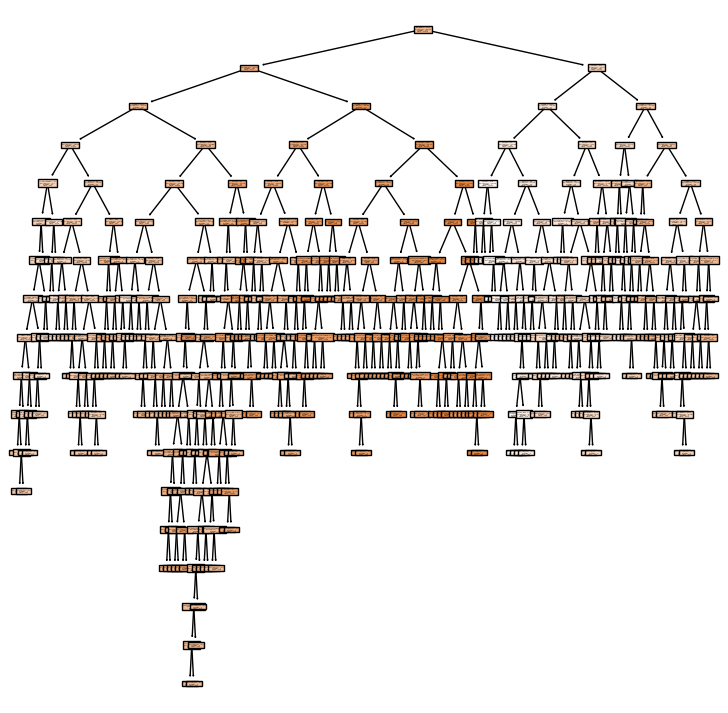

In [37]:
plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(decision_tree, feature_names=list(X.columns), filled=True)

In [38]:
DT_y_pred_train = decision_tree.predict(X_train)
DT_y_pred_test  = decision_tree.predict(X_test)

DT_train_mse = mean_squared_error( y_train , DT_y_pred_train )
DT_test_mse  = mean_squared_error( y_test  , DT_y_pred_test )

DT_train_r2 = r2_score( y_train , DT_y_pred_train )
DT_test_r2  = r2_score( y_test  , DT_y_pred_test )

print('Train MSE :' , DT_train_mse)
print('Test MSE  :' , DT_test_mse)
print('Train r²  :' , DT_train_r2)
print('Test r²   :' , DT_test_r2)

Train MSE : 0.0
Test MSE  : 24.726315789473684
Train r²  : 1.0
Test r²   : 0.78622419947235


As expected, and also noticed from the decision tree figure and the training performance metrics, our DT model overfits the data, and this affects the predictive quality for unseen entries.

Let's try to look for an optimal depth for our decision tree :

In [39]:
#Define a range of depths to try
depths_to_try = range(1, 21)

# Initialise empty lists to store results
mse_scores = []
r2_scores = []

# Iterate over depths and fit models
for depth in depths_to_try:
    # Train the model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print the results
for depth, mse, r2 in zip(depths_to_try, mse_scores, r2_scores):
    print(f"Depth: {depth}, MSE: {mse}, R2: {r2}")

Depth: 1, MSE: 69.61399954836556, R2: 0.3981396740181292
Depth: 2, MSE: 37.13256712562022, R2: 0.6789637271272945
Depth: 3, MSE: 27.757435332457543, R2: 0.7600181115005935
Depth: 4, MSE: 21.71358451114448, R2: 0.8122713084020878
Depth: 5, MSE: 19.072598164887072, R2: 0.835104429808477
Depth: 6, MSE: 17.589980342871126, R2: 0.8479226682584182
Depth: 7, MSE: 25.147770356868914, R2: 0.7825804383759515
Depth: 8, MSE: 25.674531568476077, R2: 0.7780262297887516
Depth: 9, MSE: 27.26010293259604, R2: 0.7643178880145695
Depth: 10, MSE: 24.627492839240958, R2: 0.7870785910232942
Depth: 11, MSE: 24.410491228070175, R2: 0.7889547173956499
Depth: 12, MSE: 24.754573099415207, R2: 0.7859798958282107
Depth: 13, MSE: 25.236842105263158, R2: 0.7818103525904466
Depth: 14, MSE: 26.31578947368421, R2: 0.7724821194895168
Depth: 15, MSE: 27.178947368421053, R2: 0.765019533008773
Depth: 16, MSE: 25.54736842105263, R2: 0.779125641600423
Depth: 17, MSE: 26.810526315789474, R2: 0.7682047833359198
Depth: 18, MSE:

It seems that a depth of 6 is the most optimal one in a range of 1 to 20, because it represents the highest r² and the lowest MSE among all other depths :

In [40]:
# Instantiate optimal regression tree model
optimal_decision_tree = DecisionTreeRegressor(max_depth=6, random_state=100)
optimal_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=100)

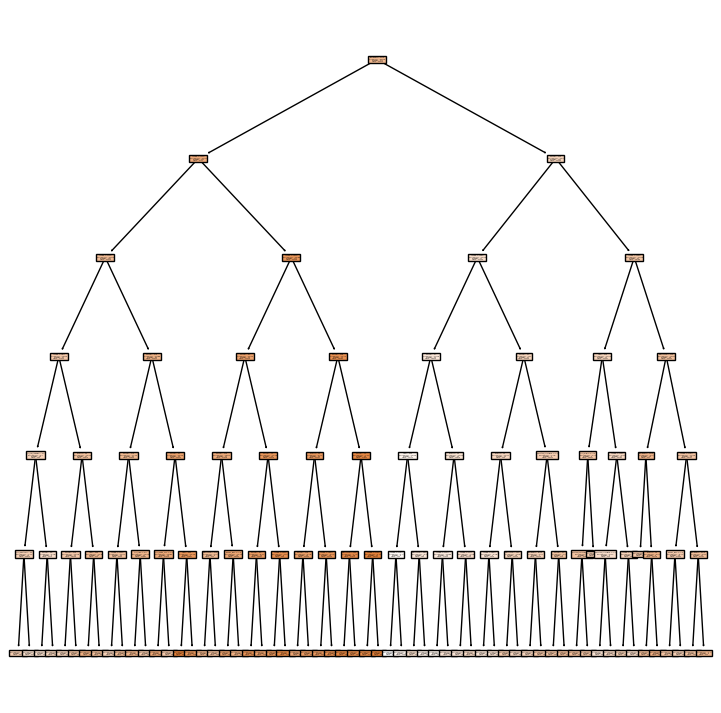

In [41]:
plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(optimal_decision_tree, feature_names=list(X.columns), filled=True)

In [42]:
optimal_DT_y_pred_train = optimal_decision_tree.predict(X_train)
optimal_DT_y_pred_test  = optimal_decision_tree.predict(X_test)

optimal_DT_train_mse = mean_squared_error( y_train , optimal_DT_y_pred_train )
optimal_DT_test_mse  = mean_squared_error( y_test  , optimal_DT_y_pred_test )

optimal_DT_train_r2 = r2_score( y_train , optimal_DT_y_pred_train )
optimal_DT_test_r2  = r2_score( y_test  , optimal_DT_y_pred_test )

print('Train MSE :' , optimal_DT_train_mse)
print('Test MSE  :' , optimal_DT_test_mse)
print('Train r²  :' , optimal_DT_train_r2)
print('Test r²   :' , optimal_DT_test_r2)

Train MSE : 6.451909712237074
Test MSE  : 18.526530050473465
Train r²  : 0.92798637931722
Test r²   : 0.8398255596886951


At least we ensured a development in predictive accuracy of our model for unseen data, and we avoided, to a certain level, the overfitting issue.

### D.2. Random Forest

Overfitting is a risk when working with decision trees - it is easy to for the tree to become too
complex, and thus fit details of the individual data points rather than the overall properties of
the distributions they are drawn from. This issue can be addressed by using **random forests**.

A random forest is a powerful non-parametric algorithm and an **ensemble method** built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is the aggregated prediction of the individual trees. The mean prediction is used for a **regression** problem while **classification** problems use the mode of the ensembled trees as opposed to the mean.

In [43]:
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=100)
RF.fit(X_train, y_train)

# Get predictions
RF_y_pred_train = RF.predict(X_train)
RF_y_pred_test  = RF.predict(X_test)

RF_train_mse = mean_squared_error( y_train , RF_y_pred_train )
RF_test_mse  = mean_squared_error( y_test  , RF_y_pred_test )

RF_train_r2 = r2_score( y_train , RF_y_pred_train )
RF_test_r2  = r2_score( y_test  , RF_y_pred_test )

print('Train MSE :' , RF_train_mse)
print('Test MSE  :' , RF_test_mse)
print('Train r²  :' , RF_train_r2)
print('Test r²   :' , RF_test_r2)

Train MSE : 7.519148997854722
Test MSE  : 15.473848913689976
Train r²  : 0.9160742837486069
Test r²   : 0.8662180622890769


In [44]:
# Extract feature importances from the model
feature_importances = RF.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)
sorted_importances

Mortgage                  0.438551
Income                    0.390572
CCAvg                     0.124698
Family                    0.017450
Age                       0.008764
Experience                0.008625
Gender_Male               0.001970
Securities_Account        0.001153
Area_San_Diego            0.001070
Online                    0.001038
Area_Los_Angeles          0.000692
Area_Santa_Cruz           0.000615
Area_Riverside            0.000569
Area_Sacramento           0.000558
Education_Undergrad       0.000557
Area_Santa_Clara          0.000531
CD_Account                0.000492
Area_Monterey             0.000404
Area_Orange               0.000259
Area_San_Francisco        0.000253
Area_Marin                0.000222
Area_Ventura              0.000206
Education_Professional    0.000206
Area_Kern                 0.000160
Area_Santa_Barbara        0.000138
Area_Yolo                 0.000102
Area_Contra_Costa         0.000098
Area_Sonoma               0.000032
Area_San_Bernardino 

This random forest model presented a better accuracy and effeciency toward the data, in comparaison the the previous decision tree models.

### E. Comparing Model Performance

Now that we've completed training 10 different regression models, we should compare between their metrics in order to decide the one that we will keep and save :

In [45]:
# Let's create a dataframe containing the summary of our analysis

# Create list of lists containing data.
list_df = [ [all_train_mse, all_test_mse, all_train_r2, all_test_r2], 
            [CP_train_mse,  CP_test_mse,  CP_train_r2,  CP_test_r2],
            [VAR_train_mse, VAR_test_mse, VAR_train_r2, VAR_test_r2 ],
            [ridg_train_mse, ridg_test_mse, ridg_train_r2, ridg_test_r2 ],
            [ridg_train_mse_cv, ridg_test_mse_cv, ridg_train_r2_cv, ridg_test_r2_cv ],
            [lass_train_mse, lass_test_mse, lass_train_r2, lass_test_r2 ],
            [lass_train_mse_cv, lass_test_mse_cv, lass_train_r2_cv, lass_test_r2_cv ],
            [DT_train_mse, DT_test_mse, DT_train_r2, DT_test_r2 ],
            [optimal_DT_train_mse, optimal_DT_test_mse, optimal_DT_train_r2, optimal_DT_test_r2 ],
            [RF_train_mse , RF_test_mse, RF_train_r2, RF_test_r2 ] ]

# Create index – names of players.
index = ['MLR all var',
         'MLR p_val',
         'MLR variance',
         'Ridge',
         'Ridge cv',
         'Lasso',
         'Lasso cv',
         'Decision Tree',
         'Optimal DT',
         'Random Forest']

# Create column names.
columns = ['Train MSE', 'Test MSE', 'Train r2', 'Test r2']

# Create a DataFrame by passing in data, index, and columns.
summary = pd.DataFrame(data=list_df, index=index, columns=columns)
summary

,Train MSE,Test MSE,Train r2,Test r2
MLR all var,20.475770,26.278908,0.771458,0.772801
MLR p_val,21.917024,24.592532,0.755371,0.787381
MLR variance,20.923258,24.803999,0.766463,0.785553
Ridge,20.488890,26.322956,0.771311,0.772420
Ridge cv,20.613999,26.891408,0.769915,0.767506
Lasso,20.521912,26.163805,0.770943,0.773796
Lasso cv,21.314051,25.898756,0.762101,0.776088
Decision Tree,0.000000,24.726316,1.000000,0.786224
Optimal DT,6.451910,18.526530,0.927986,0.839826
Random Forest,7.519149,15.473849,0.916074,0.866218


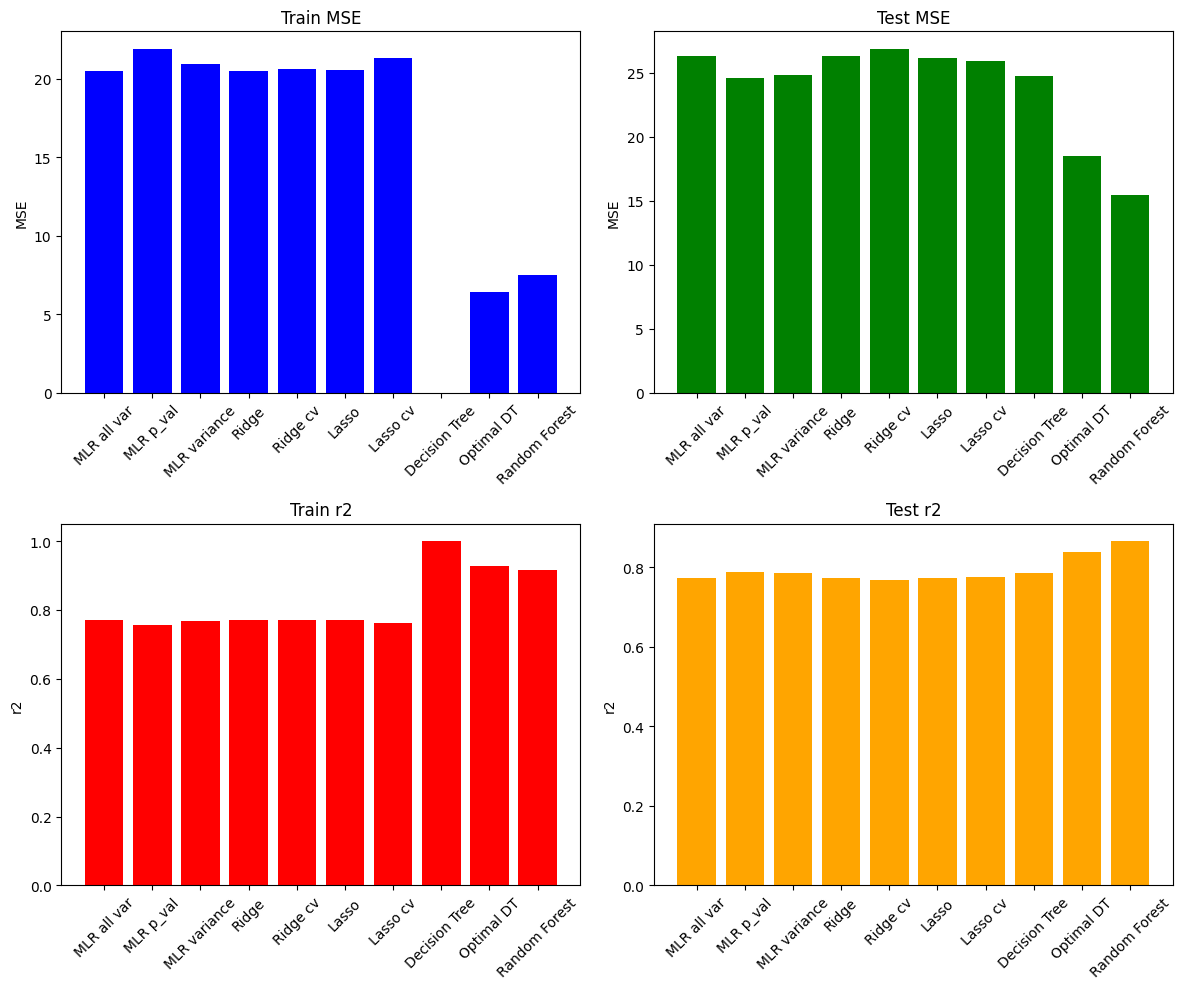

In [46]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Train MSE
axes[0, 0].bar(summary.index, summary['Train MSE'], color='blue')
axes[0, 0].set_title('Train MSE')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Test MSE
axes[0, 1].bar(summary.index, summary['Test MSE'], color='green')
axes[0, 1].set_title('Test MSE')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Train r2
axes[1, 0].bar(summary.index, summary['Train r2'], color='red')
axes[1, 0].set_title('Train r2')
axes[1, 0].set_ylabel('r2')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Test r2
axes[1, 1].bar(summary.index, summary['Test r2'], color='orange')
axes[1, 1].set_title('Test r2')
axes[1, 1].set_ylabel('r2')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

From those barplots, it's showed clearly that Decision Tree with a max depth = 6 and the Random Forest models are the best ones in term of MSE and r² (I excluded the normal Decision Tree model because, as we saw earlier, it suffers from overfitting problem). The two models perform very well for both training and testing data, with a favour for optimal DT in training, and a favour for Random Forest in testing. So, I suggest to keep the Random Forest model because it's the most powerful one regarding dealing with new and unseen data.

### F. Saving Model

Files saved using pickle are called **pickles** and the process of making them is referred to as **pickling**.

Luckily for us, saving models using pickle follows a similar structure to that of creating or writing to a file in Python.

We specify that we want to save our model in a pickle file, indicated by the **.pkl** extension.

We open the file in **write-binary (wb)** mode -if the file doesn't exist, it will be created. Otherwise, its contents will be overwritten.

We then use the **pickle.dump()** method to serialize the model object and saving it into the file.

This creates a **portable `model.pkl` file** in the specified file path which we **can move** between computers, email to others, use for model versioning, etc. We can also use this file to **make predictions** in the future.

In [47]:
# Importing the pickle library
import pickle

# Save the model just like we would a Python file
model_save_path = "Random_Forest_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RF, file)